In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

wk_incomes = pd.read_csv('Data/wk_incomes.csv')
wk_incomes= wk_incomes.drop('Unnamed: 0', 1)

In [2]:
y = wk_incomes['Gender']
X = wk_incomes.drop(columns=['Gender'], axis=1)

rel_columns = [ 'Monthly Income', 'Literacy', 'Scholarship','Career', 'Marital Status', 'By Position','By Economic Sector']
X = pd.get_dummies(X[rel_columns], drop_first=True, dtype=float)

scaler = MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),
            columns=X.columns, index=X.index) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [3]:
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.6827088346510829


In [4]:
## with gini
target = wk_incomes['Gender']
data = wk_incomes.drop(columns=['Gender'], axis=1)


rel_columns = ['Monthly Income', 'Literacy', 'Scholarship','Career', 'Marital Status', 'By Position','By Economic Sector']
data = pd.get_dummies(data[rel_columns], drop_first=True, dtype=float)

scaler = MinMaxScaler()
data=pd.DataFrame(scaler.fit_transform(data),
            columns=data.columns, index=data.index) 

data_train, data_test, target_train, target_test = train_test_split(data, target, 
                                                                    test_size = 0.25, random_state=123)

# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

[[14583  3561]
 [ 6709  6661]]
              precision    recall  f1-score   support

      Hombre       0.68      0.80      0.74     18144
       Mujer       0.65      0.50      0.56     13370

    accuracy                           0.67     31514
   macro avg       0.67      0.65      0.65     31514
weighted avg       0.67      0.67      0.67     31514

Testing Accuracy for Decision Tree Classifier: 67.41%


In [5]:
# Feature importance
tree_clf.feature_importances_

array([2.59850425e-01, 0.00000000e+00, 0.00000000e+00, 8.61071396e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.00910283e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.29065914e-04,
       0.00000000e+00, 7.52056676e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

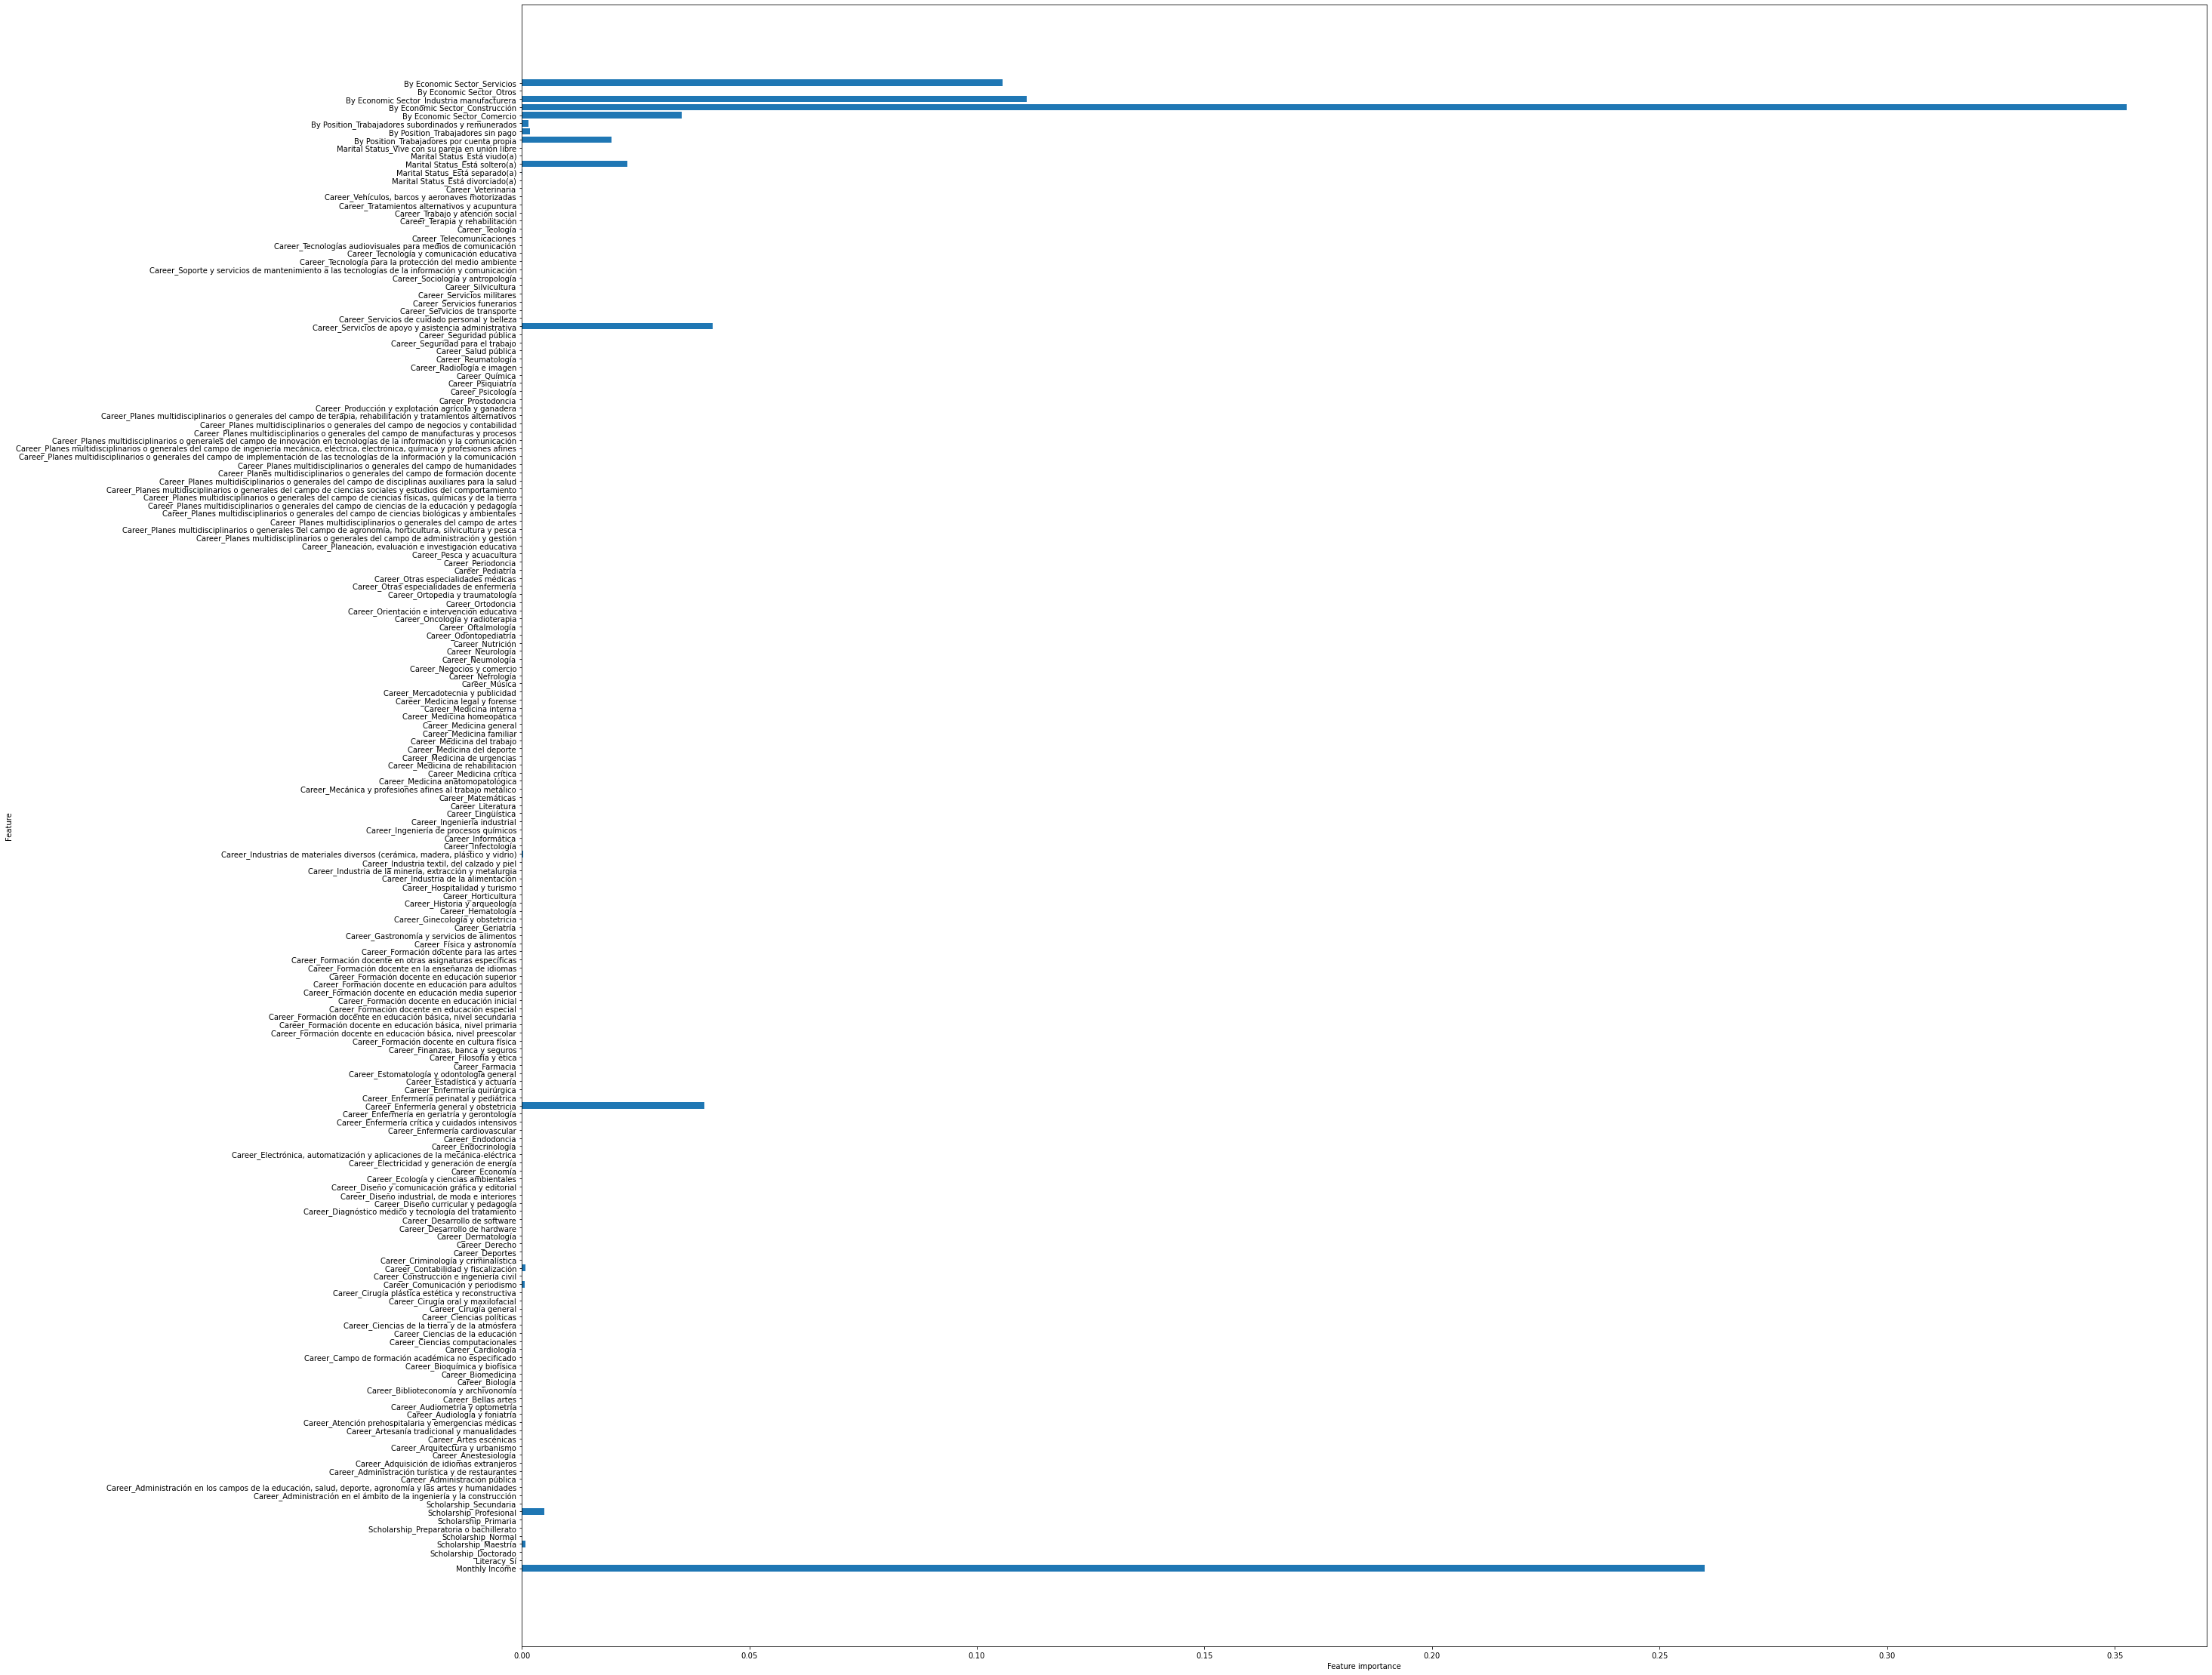

In [6]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(40,40))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [7]:
## Bagging

# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)
# Fit to the training data
bagged_tree.fit(data_train, target_train)

# Training accuracy score
bagged_tree.score(data_train, target_train)

0.6819052051490887

In [8]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.6771910896744304

In [9]:
## Random Forest

# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)
# Training accuracy score
forest.score(data_train, target_train)

0.6423456489776922

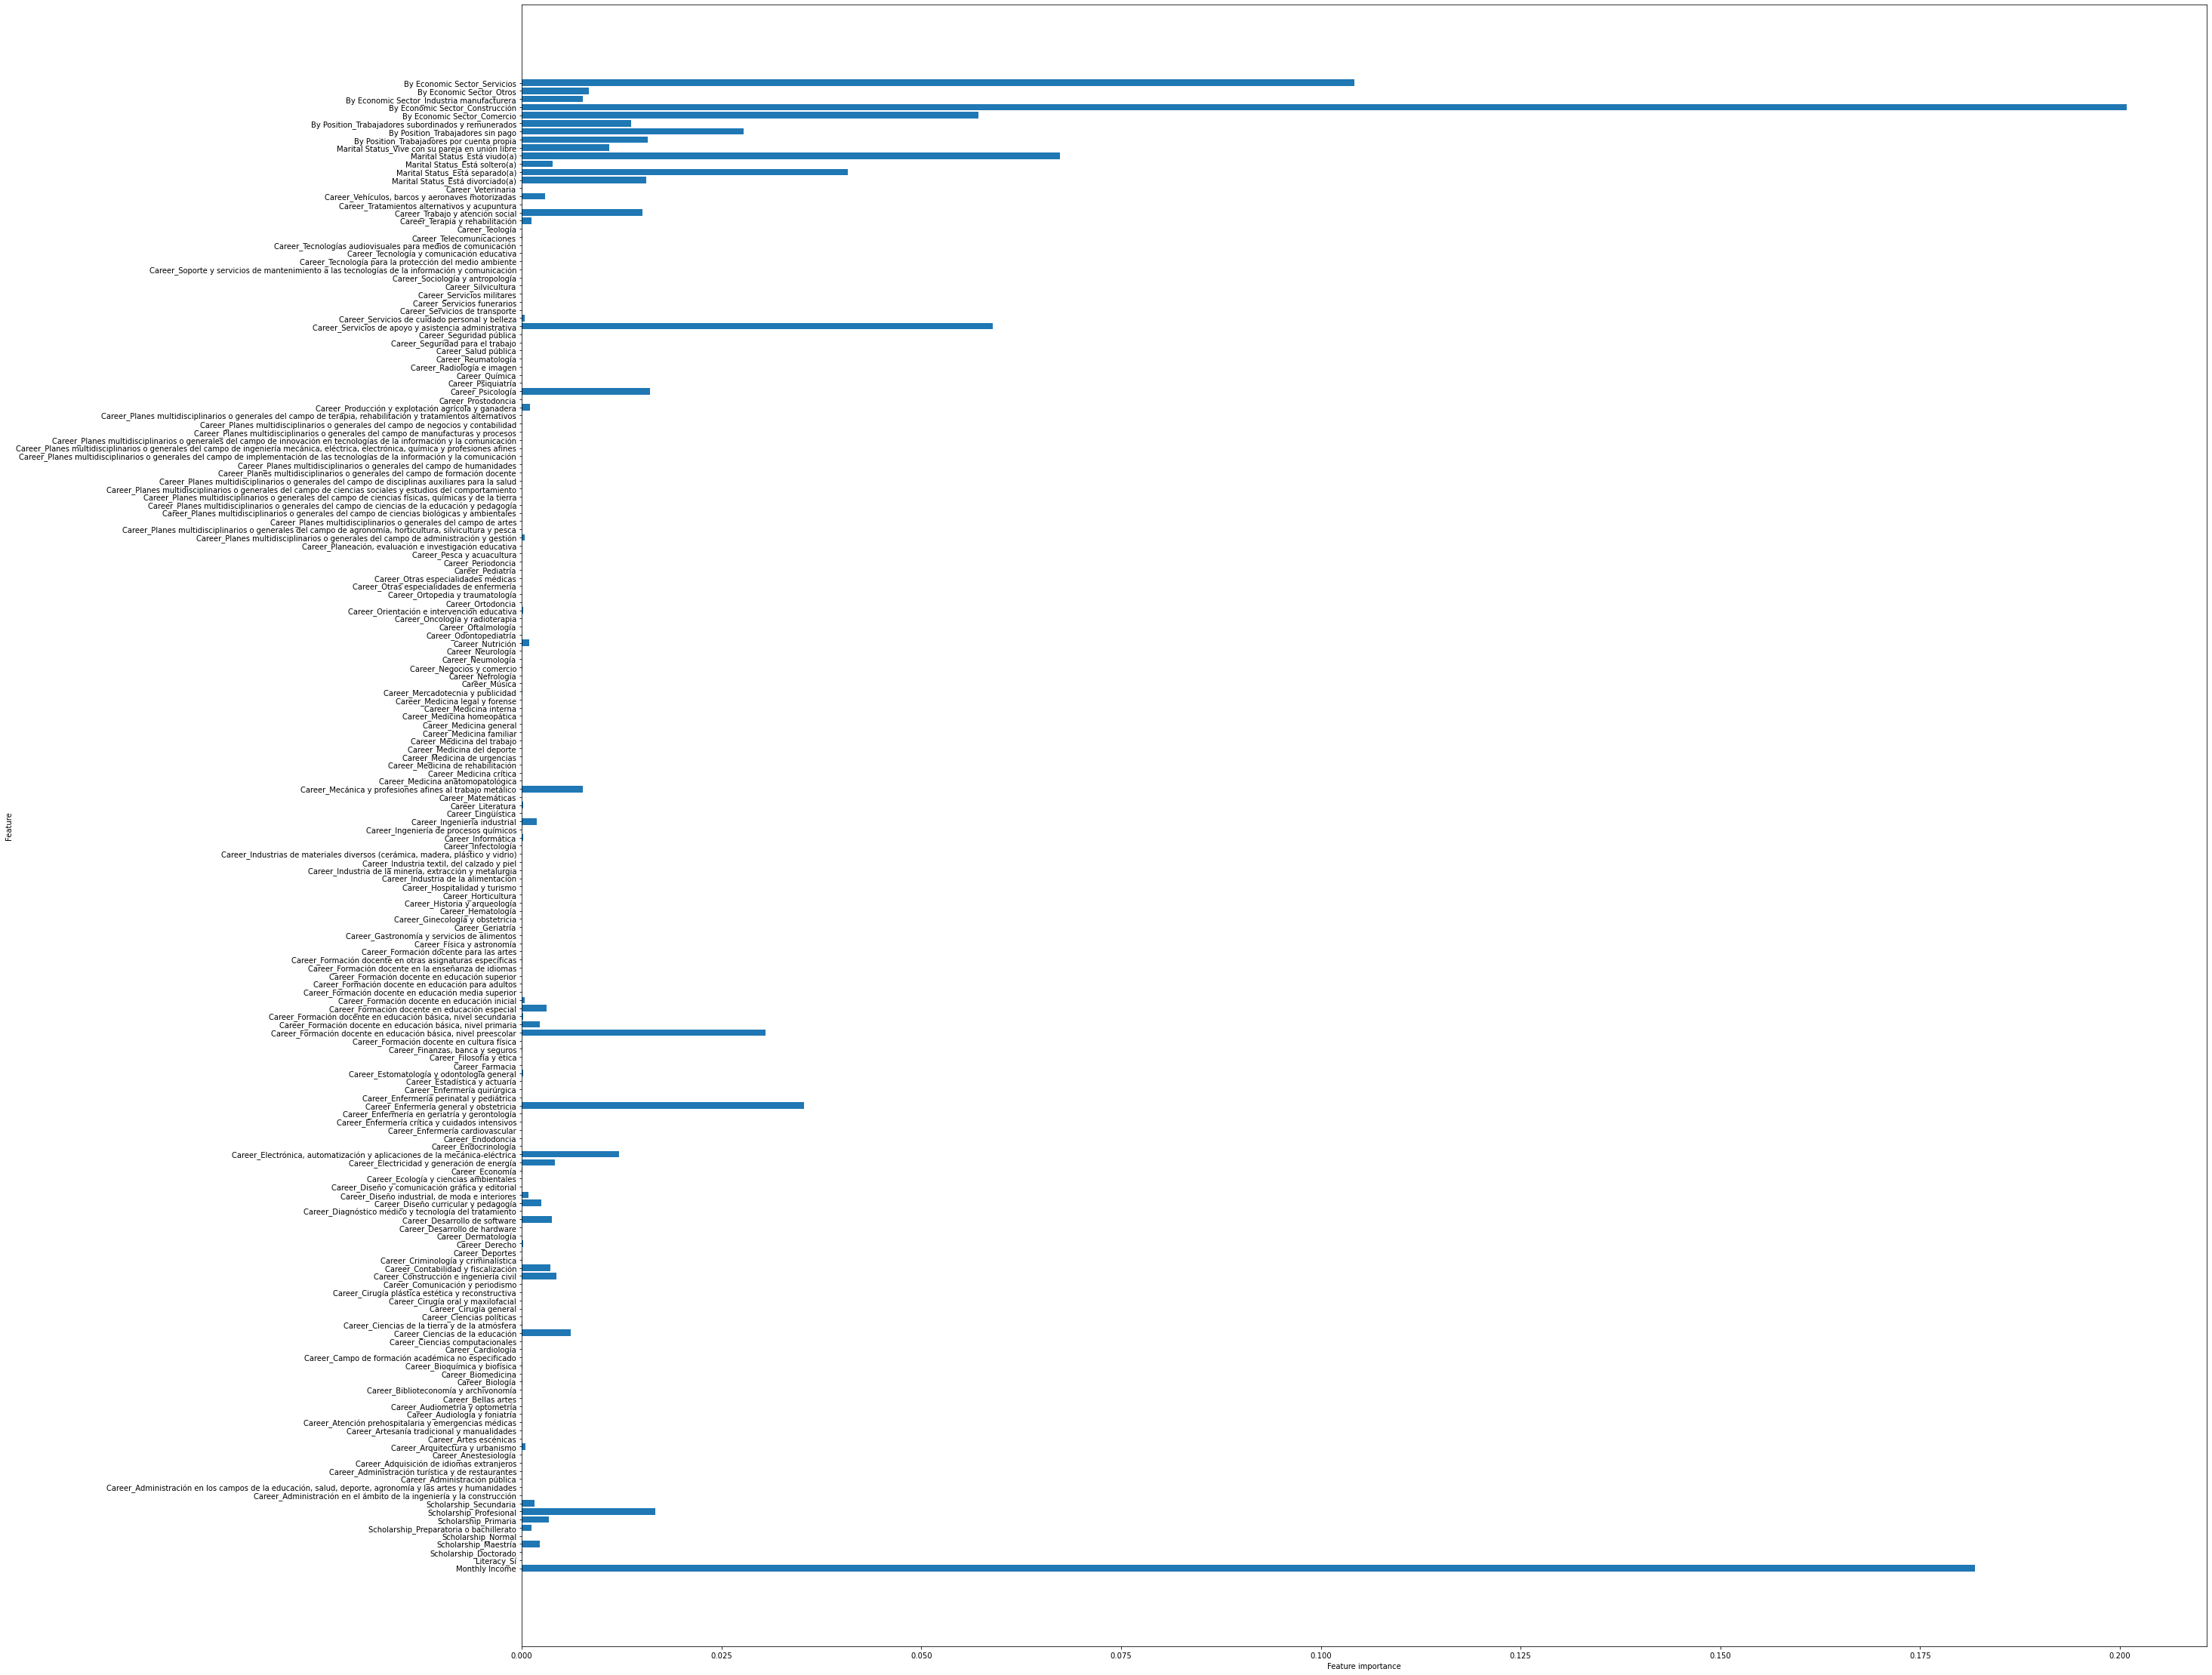

In [12]:
# Feature importance
forest.feature_importances_
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(40,40))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(forest)

In [13]:
# Prunning

# Instantiate and fit a DecisionTreeClassifier
tree_clf2 = DecisionTreeClassifier(criterion='gini', min_samples_split=8, max_depth=100, splitter='best', min_samples_leaf= 100) 
tree_clf2.fit(data_train, target_train)

tree_clf2.score(data_train, target_train)

0.7113421690060397

In [14]:
tree_clf2.score(data_test, target_test)

0.6984514818810688

In [15]:
# Instantiate a BaggingClassifier
bagged_tree2 =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', min_samples_split=8, max_depth=100, splitter='best', min_samples_leaf= 100), 
                                 n_estimators=20)
# Fit to the training data
bagged_tree2.fit(data_train, target_train)

# Training accuracy score
bagged_tree2.score(data_train, target_train)

0.7126431918426925

In [16]:
# Test accuracy score
bagged_tree2.score(data_test, target_test)

0.7030843434663959